In [2]:
# USAGE
# python facial_landmarks.py --shape-predictor shape_predictor_68_face_landmarks.dat --image images/example_01.jpg 

# import the necessary packages
from imutils import face_utils
import os
import numpy as np
import argparse
import imutils
import dlib
import cv2
from matplotlib.pyplot import imshow
%matplotlib inline



In [23]:
real_face_directory = '/ssd/catwong/cartoonnetwork/canonical/'
real_image_names = os.listdir(real_face_directory)
real_image_files = [real_face_directory + image for image in real_image_names]
all_celebrities = set([path.split('_')[0] for path in real_image_names if '.DS' not in path])
print all_celebrities


set(['JayLeno', 'RobertDowneyJr', 'JackieChan', 'NelsonMandela', 'Oprah', 'AngelaMerkel', 'beyonce', 'TigerWoods', 'MattDamon', 'Rihanna', 'RowanAtkinson', 'JohnLennon', 'PeterJackson', 'DwayneJohnson', 'AlbertEinstein', 'HughJackman', 'Federer', 'BruceWillis', 'BarackObama', 'DanielRadcliffe', 'che', 'LeonardoDiCaprio', 'ScarlettJohansson', 'MichaelJordan', 'NicoleKidman', 'AbrahamLincoln', 'JustinBieber', 'VladimirPutin', 'PrincessDiana', 'pele', 'BillClinton', 'BradPitt', 'MorganFreeman', 'AngelinaJolie', 'JohnFKennedy', 'PrinceCharles', 'KimJongUn', 'hillaryclinton', 'QuentinTarantino', 'MLK', 'SteveJobs', 'MarkZuckerberg', 'JayZ', 'RussellCrowe', 'Gandhi', 'MalcolmX', 'ElvisPresley', 'MeganFox', 'TomCruise', 'JKRowling', 'MarilynMonroe', 'BillGates', 'PabloPicasso', 'GeorgeClooney', 'DalaiLama', 'SylvesterStallone', 'MilaKunis', 'PaulMccartney', 'lucilleball', 'SelenaGomez', 'Shakira', 'BritneySpears', 'ArnoldSchwarzenegger', 'AishwaryaRai', 'JimCarrey', 'DanielCraig', 'EmmaWatson

In [25]:
caricature_directory = '/ssd/catwong/cartoonnetwork/good_caricatures/'
caricature_names = os.listdir(caricature_directory)
caricature_files = [caricature_directory + image for image in caricature_names]


2916


In [34]:
def get_keypoints(image_name):
    # initialize dlib's face detector (HOG-based) and then create
    # the facial landmark predictor
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

    # load the input image, resize it, and convert it to grayscale
    image = cv2.imread(image_name)
    if image == None:
        return image
    image = imutils.resize(image, width=500)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # detect faces in the grayscale image
    rects = detector(gray, 1)
    if len(rects) == 0:
        return None
    # loop over the face detections
    for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        return shape

In [162]:
train_celebrities = list(all_celebrities)[:55]
test_celebrities = list(all_celebrities)[55:]
train_real = [real_face_directory + path for path in real_image_names if path.split('_')[0] in train_celebrities]
train_car = [caricature_directory + path for path in caricature_names if path.split('_')[0] in train_celebrities]
test_real = [real_face_directory + path for path in real_image_names if path.split('_')[0] in test_celebrities]
test_car = [caricature_directory + path for path in caricature_names if path.split('_')[0] in test_celebrities]
train_car_map = defaultdict(list)
for path in caricature_names:
    if path.split('_')[0] in train_celebrities:
        train_car_map[path.split('_')[0]] +=  [caricature_directory + path]

#train_car_map = {path.split('_')[0]: caricature_directory + path for path in caricature_names if path.split('_')[0] in train_celebrities}
#test_car_map = {path.split('_')[0]: caricature_directory + path for path in caricature_names if path.split('_')[0] in test_celebrities}


print len(train_real), len(train_car), len(test_real), len(test_car), len(train_car_map), len(test_car_map)

272 2303 60 451 53 12


In [35]:
from collections import defaultdict

train_keypoints = []
train_names = []


for file_name in train_real:
    keypoints = get_keypoints(file_name)
    if keypoints != None:
        print file_name
        train_keypoints += [keypoints]
        train_names += [file_name]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


/ssd/catwong/cartoonnetwork/canonical/TomCruise_3.jpg
/ssd/catwong/cartoonnetwork/canonical/VladimirPutin_4.jpg
/ssd/catwong/cartoonnetwork/canonical/HughJackman_1.jpg
/ssd/catwong/cartoonnetwork/canonical/KimJongUn_0.jpg
/ssd/catwong/cartoonnetwork/canonical/AngelaMerkel_3.jpg
/ssd/catwong/cartoonnetwork/canonical/MalcolmX_4.jpg
/ssd/catwong/cartoonnetwork/canonical/MichaelJordan_2.jpg
/ssd/catwong/cartoonnetwork/canonical/RobertDowneyJr_4.jpg
/ssd/catwong/cartoonnetwork/canonical/JustinBieber_2.jpg
/ssd/catwong/cartoonnetwork/canonical/ElvisPresley_0.jpg
/ssd/catwong/cartoonnetwork/canonical/GeorgeClooney_3.jpg
/ssd/catwong/cartoonnetwork/canonical/PrincessDiana_3.jpg
/ssd/catwong/cartoonnetwork/canonical/AngelaMerkel_1.jpg
/ssd/catwong/cartoonnetwork/canonical/PeterJackson_2.jpg
/ssd/catwong/cartoonnetwork/canonical/PrinceCharles_0.jpg
/ssd/catwong/cartoonnetwork/canonical/JKRowling_3.jpg
/ssd/catwong/cartoonnetwork/canonical/BillGates_3.jpg
/ssd/catwong/cartoonnetwork/canonical/Dal

In [36]:
test_keypoints = []
test_names = []

for file_name in test_real:
    keypoints = get_keypoints(file_name)
    if keypoints != None:
        print file_name
        test_keypoints += [keypoints]
        test_names += [file_name]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


/ssd/catwong/cartoonnetwork/canonical/SelenaGomez_1.jpg
/ssd/catwong/cartoonnetwork/canonical/EmmaWatson_2.jpg
/ssd/catwong/cartoonnetwork/canonical/DanielCraig_2.jpg
/ssd/catwong/cartoonnetwork/canonical/EmmaWatson_4.jpg
/ssd/catwong/cartoonnetwork/canonical/SelenaGomez_2.jpg
/ssd/catwong/cartoonnetwork/canonical/SylvesterStallone_0.jpg
/ssd/catwong/cartoonnetwork/canonical/BritneySpears_1.jpg
/ssd/catwong/cartoonnetwork/canonical/Shakira_0.jpg
/ssd/catwong/cartoonnetwork/canonical/JimCarrey_4.jpg
/ssd/catwong/cartoonnetwork/canonical/SylvesterStallone_1.jpg
/ssd/catwong/cartoonnetwork/canonical/DanielCraig_3.jpg
/ssd/catwong/cartoonnetwork/canonical/ArnoldSchwarzenegger_3.jpg
/ssd/catwong/cartoonnetwork/canonical/AishwaryaRai_4.jpg
/ssd/catwong/cartoonnetwork/canonical/EmmaWatson_3.jpg
/ssd/catwong/cartoonnetwork/canonical/SylvesterStallone_3.jpg
/ssd/catwong/cartoonnetwork/canonical/lucilleball_2.jpg
/ssd/catwong/cartoonnetwork/canonical/PaulMccartney_0.jpg
/ssd/catwong/cartoonnetwo

In [148]:
car_keypoints = {}

for i, file_name in enumerate(train_car):
    keypoints = get_keypoints(file_name)
    if i % 100 == 0:
        print i
    if keypoints != None:
        car_keypoints[file_name] = keypoints

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800


KeyboardInterrupt: 

In [50]:
def normalize_keypoint(keypoint):
    keypoint = keypoint - np.mean(keypoint, axis=0)
    keypoint = keypoint.ravel()
    keypoint = keypoint/np.linalg.norm(keypoint)
    return keypoint


normalized_train_keypoints = [normalize_keypoint(keypoint) for keypoint in train_keypoints]
normalized_test_keypoints = [normalize_keypoint(keypoint) for keypoint in test_keypoints]
normalized_train_arr = np.asarray(normalized_train_keypoints)
print normalized_train_arr.shape

(268, 136)


In [145]:
pairs = []
from scipy.spatial.distance import cdist
for i, test_name in enumerate(test_names):
    test_keypoint = np.expand_dims(normalized_test_keypoints[i], axis=0)
    distances = cdist(test_keypoint, normalized_train_arr)
    if np.amin(distances) < 0.07:
        pairs += [(test_name, train_names[np.argmin(distances)], i, np.argmin(distances))]
        print len(pairs)-1, test_name, train_names[np.argmin(distances)], np.amin(distances)

    


0 /ssd/catwong/cartoonnetwork/canonical/EmmaWatson_2.jpg /ssd/catwong/cartoonnetwork/canonical/beyonce_2.jpg 0.0570833487212
1 /ssd/catwong/cartoonnetwork/canonical/DanielCraig_2.jpg /ssd/catwong/cartoonnetwork/canonical/BruceWillis_3.jpg 0.0583611404475
2 /ssd/catwong/cartoonnetwork/canonical/EmmaWatson_4.jpg /ssd/catwong/cartoonnetwork/canonical/BarackObama_1.jpg 0.0679214915168
3 /ssd/catwong/cartoonnetwork/canonical/SelenaGomez_2.jpg /ssd/catwong/cartoonnetwork/canonical/NicoleKidman_2.jpg 0.0697707323596
4 /ssd/catwong/cartoonnetwork/canonical/SylvesterStallone_1.jpg /ssd/catwong/cartoonnetwork/canonical/MattDamon_4.jpg 0.0624457103871
5 /ssd/catwong/cartoonnetwork/canonical/AishwaryaRai_4.jpg /ssd/catwong/cartoonnetwork/canonical/beyonce_0.jpg 0.0691450890852
6 /ssd/catwong/cartoonnetwork/canonical/SylvesterStallone_3.jpg /ssd/catwong/cartoonnetwork/canonical/AlbertEinstein_3.jpg 0.0621958663991
7 /ssd/catwong/cartoonnetwork/canonical/PaulMccartney_4.jpg /ssd/catwong/cartoonnetwo

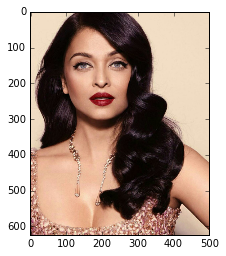

In [180]:
from PIL import Image
i = 17
imshow(Image.open(pairs[i][0]))

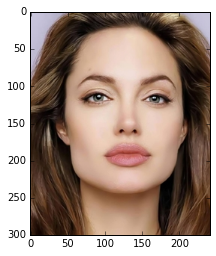

In [181]:
imshow(Image.open(pairs[i][1]))

In [163]:
train_car_map['DalaiLama']

['/ssd/catwong/cartoonnetwork/good_caricatures/DalaiLama_0.jpg',
 '/ssd/catwong/cartoonnetwork/good_caricatures/DalaiLama_31.jpg',
 '/ssd/catwong/cartoonnetwork/good_caricatures/DalaiLama_38.jpg',
 '/ssd/catwong/cartoonnetwork/good_caricatures/DalaiLama_8.jpg',
 '/ssd/catwong/cartoonnetwork/good_caricatures/DalaiLama_33.jpg',
 '/ssd/catwong/cartoonnetwork/good_caricatures/DalaiLama_39.jpg',
 '/ssd/catwong/cartoonnetwork/good_caricatures/DalaiLama_19.jpg',
 '/ssd/catwong/cartoonnetwork/good_caricatures/DalaiLama_36.jpg',
 '/ssd/catwong/cartoonnetwork/good_caricatures/DalaiLama_10.jpg',
 '/ssd/catwong/cartoonnetwork/good_caricatures/DalaiLama_4.jpg',
 '/ssd/catwong/cartoonnetwork/good_caricatures/DalaiLama_16.jpg',
 '/ssd/catwong/cartoonnetwork/good_caricatures/DalaiLama_34.jpg',
 '/ssd/catwong/cartoonnetwork/good_caricatures/DalaiLama_24.jpg',
 '/ssd/catwong/cartoonnetwork/good_caricatures/DalaiLama_26.jpg',
 '/ssd/catwong/cartoonnetwork/good_caricatures/DalaiLama_23.jpg',
 '/ssd/catwon

In [175]:
import cv2
from scipy.misc import imsave

i= 0
for pair in pairs:
    original_file = pair[0]
    matching_file = pair[1]
    original_keypoints = test_keypoints[pair[2]]
    #matching_keypoints = train_keypoints[pair[3]]
    #original_photo = cv2.imread(pair[0])
    #matching_photo = cv2.imread(pair[1])
    matching_person = matching_file.split('/')[-1].split('_')[0]
    candidates = train_car_map[matching_person]
    for candidate in candidates:
        if candidate in car_keypoints:
            i += 1
            new_file = original_file.split('/')[-1][:-4] + "_" + candidate.split('/')[-1][:-4] + ".jpg"
            caricature_keypoints = car_keypoints[candidate]
            h, status = cv2.findHomography(original_keypoints, caricature_keypoints)
            photo = cv2.imread(original_file)
            caricature = cv2.imread(candidate)
            im_dst = cv2.warpPerspective(photo, h, (1000, 1000))
            photo = cv2.resize(photo, (1000, 1000))
            caricature =  cv2.resize(caricature, (1000, 1000))
            concatenated = np.hstack((photo, caricature, im_dst))
            imshow(concatenated)
            imsave(os.path.join('homographies2', new_file), concatenated)
            print new_file, i
    #print original_file, len(train_car_map[matching_person])
    
    #h1, status1 = cv2.findHomography(original_keypoints, matching_keypoints)
    #print pair
print i


# See which ones have both
# for person in input_keypoints:
#     if person in target_keypoints:
#         count = 0
#         for i in range(len(input_keypoints[person])):
#             for j in range(len(target_keypoints[person])):
#                 photo_example = input_keypoints[person][i]
#                 caricature_example = target_keypoints[person][j]
#                 print photo_example[0], caricature_example[0]
#                 original_photo_keypoints = photo_example[1]
#                 original_caricature_keypoints = caricature_example[1]
#                 photo = cv2.imread("dotted/"+photo_example[0] + ".jpg")
#                 caricature = cv2.imread("dotted/"+caricature_example[0] + ".jpg")
#                 h, status = cv2.findHomography(original_photo_keypoints, original_caricature_keypoints)
#                 im_dst = cv2.warpPerspective(photo, h, (500, 500))
#                 photo = cv2.resize(photo, (500, 500))
#                 caricature =  cv2.resize(caricature, (500, 500))
#                 print im_dst.shape, photo.shape, caricature.shape
#                 concatenated = np.hstack((photo, caricature, im_dst))
#                 imshow(concatenated)
#                 imsave(os.path.join('warps', person+str(count)+".jpg"), concatenated)
#                 count += 1

# def rectify_face(image, keypoints):
    

EmmaWatson_2_beyonce_15.jpg 1
EmmaWatson_2_beyonce_5.jpg 2
EmmaWatson_2_beyonce_19.jpg 3
EmmaWatson_2_beyonce_14.jpg 4
EmmaWatson_2_beyonce_4.jpg 5
EmmaWatson_2_beyonce_9.jpg 6
EmmaWatson_2_beyonce_13.jpg 7
EmmaWatson_2_beyonce_10.jpg 8
EmmaWatson_2_beyonce_12.jpg 9
EmmaWatson_2_beyonce_6.jpg 10
EmmaWatson_2_beyonce_11.jpg 11
EmmaWatson_2_beyonce_0.jpg 12
EmmaWatson_2_beyonce_2.jpg 13
EmmaWatson_2_beyonce_17.jpg 14
DanielCraig_2_BruceWillis_41.jpg 15
DanielCraig_2_BruceWillis_40.jpg 16
DanielCraig_2_BruceWillis_10.jpg 17
DanielCraig_2_BruceWillis_23.jpg 18
DanielCraig_2_BruceWillis_1.jpg 19
DanielCraig_2_BruceWillis_3.jpg 20
DanielCraig_2_BruceWillis_49.jpg 21
DanielCraig_2_BruceWillis_8.jpg 22
DanielCraig_2_BruceWillis_51.jpg 23
DanielCraig_2_BruceWillis_37.jpg 24
DanielCraig_2_BruceWillis_2.jpg 25
DanielCraig_2_BruceWillis_11.jpg 26
DanielCraig_2_BruceWillis_29.jpg 27
DanielCraig_2_BruceWillis_46.jpg 28
DanielCraig_2_BruceWillis_9.jpg 29
DanielCraig_2_BruceWillis_17.jpg 30
DanielCrai

KeyboardInterrupt: 

In [172]:
print pairs

[('/ssd/catwong/cartoonnetwork/canonical/EmmaWatson_2.jpg', '/ssd/catwong/cartoonnetwork/canonical/beyonce_2.jpg', 1, 175), ('/ssd/catwong/cartoonnetwork/canonical/DanielCraig_2.jpg', '/ssd/catwong/cartoonnetwork/canonical/BruceWillis_3.jpg', 2, 53), ('/ssd/catwong/cartoonnetwork/canonical/EmmaWatson_4.jpg', '/ssd/catwong/cartoonnetwork/canonical/BarackObama_1.jpg', 3, 93), ('/ssd/catwong/cartoonnetwork/canonical/SelenaGomez_2.jpg', '/ssd/catwong/cartoonnetwork/canonical/NicoleKidman_2.jpg', 4, 62), ('/ssd/catwong/cartoonnetwork/canonical/SylvesterStallone_1.jpg', '/ssd/catwong/cartoonnetwork/canonical/MattDamon_4.jpg', 9, 145), ('/ssd/catwong/cartoonnetwork/canonical/AishwaryaRai_4.jpg', '/ssd/catwong/cartoonnetwork/canonical/beyonce_0.jpg', 12, 138), ('/ssd/catwong/cartoonnetwork/canonical/SylvesterStallone_3.jpg', '/ssd/catwong/cartoonnetwork/canonical/AlbertEinstein_3.jpg', 14, 158), ('/ssd/catwong/cartoonnetwork/canonical/PaulMccartney_4.jpg', '/ssd/catwong/cartoonnetwork/canonica